In [13]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

train_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.multi.bf.trec'
train_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

train_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-train-20240429-9323ec.fabc40f467c7f2262628ce1e135b0337/embedding.pkl'
filename = f'{io_path}/nq_train/run.dpr.nq-train.{fusion_tag}.all-alpha.k-{k}.res'



In [10]:
filename += '.3_classes'
print(filename)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/run.dpr.nq-train.fusion.all-alpha.k-100.res.3_classes


In [14]:
filename = f'{io_path}/nq_train/run.dpr.nq-train.{fusion_tag}.all-alpha.k-{k}.res'
train_out_json_path = f'{io_path}/nq_train/run.dpr.nq-train.{fusion_tag}.alpha-?.k-{k}.json'

cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval_all_alpha \
    --retrieval {train_out_json_path} \
    --topk 100'
res = os.system(cmd2 + f'1> {filename}')

  0%|          | 0/21 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1659it [00:00, 16586.89it/s]
3326it [00:00, 16633.55it/s]
4993it [00:00, 16648.55it/s]
6658it [00:00, 16454.98it/s]
8330it [00:00, 16548.40it/s]
9998it [00:00, 16590.38it/s]
11666it [00:00, 16616.70it/s]
13337it [00:00, 16645.16it/s]
15005it [00:00, 16654.96it/s]
16673it [00:01, 16662.28it/s]
18343it [00:01, 16670.99it/s]
20011it [00:01, 16672.14it/s]
21679it [00:01, 16671.96it/s]
23347it [00:01, 16515.62it/s]
25009it [00:01, 16545.76it/s]
26798it [00:01, 16945.41it/s]
28593it [00:01, 17243.75it/s]
30387it [00:01, 17451.94it/s]
32180it [00:01, 17594.78it/s]
33970it [00:02, 17685.18it/s]
35760it [00:02, 17747.10it/s]
37552it [00:02, 17797.77it/s]
39344it [00:02, 17831.89it/s]
41132it [00:02, 17843.86it/s]
42917it [00:02, 17699.21it/s]
44704it [00:02, 17749.56it/s]
46492it [00:02, 17787.27it/s]
48284it [00:02, 17824.44it/s]
50073it [00:02, 17842.07it/s]
51865it [00:03, 17863.22it/s]
53652it [00:03, 17300.14it/s]
55386it [00:03, 16

In [8]:
print(filename)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/run.dpr.nq-train.fusion.all-alpha.k-100.res


In [15]:
import csv
import pickle

cutoff = 200

with open(filename, 'r') as f:
    print(f'filename: {filename}')
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
    print(rows[:5])
    y = [float(alpha) for qid, alpha, num_hits in rows]
    qid_s = set([int(qid) for qid, alpha, num_hits in rows])

with open(train_bf_trec_path, 'r') as f:
    print(f'train_bf_trec_path: {train_bf_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bf_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        if qid not in qid_s:
            continue
            
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bf_score_list.append(curr)
                curr = []
        else:
            continue

with open(train_bm25_trec_path, 'r') as f:
    print(f'train_bm25_trec_path: {train_bm25_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bm25_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        if qid not in qid_s:
            continue
        
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bm25_score_list.append(curr)
                curr = []
        else:
            continue

with open(train_embedding_path, 'rb') as f:
    print(f'train_embedding_path: {train_embedding_path}')
    embeddings = pickle.load(f)
    embeddings = embeddings['embedding'].tolist()
    embeddings = [embeddings[i] for i in list(qid_s)]
    print(embeddings[:5])

filename: /dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/run.dpr.nq-train.fusion.all-alpha.k-100.res
[['0', '0.5', '0'], ['1', '0.51', '212'], ['2', '0.47', '56'], ['3', '0.48', '78'], ['4', '0.52', '63']]
train_bf_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.nq-train.multi.bf.trec
[['0', 'Q0', '12820371', '1', '79.707161', 'Faiss'], ['0', 'Q0', '11910432', '2', '79.504631', 'Faiss'], ['0', 'Q0', '2456615', '3', '77.525238', 'Faiss'], ['0', 'Q0', '2456649', '4', '77.034897', 'Faiss'], ['0', 'Q0', '6683604', '5', '76.910469', 'Faiss']]
train_bm25_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.nq-train.bm25.trec
[['0', 'Q0', '14192122', '1', '15.151974', 'Anserini'], ['0', 'Q0', '6529476', '2', '14.677754', 'Anserini'], ['0', 'Q0', '2459849', '3', '14.537527', 'Anserini'], ['0', 'Q0', '10318374', '4', '14.360787', 'Anserini'], ['0', 'Q0', '19093426', '5', '14.026484', 'Anserini']]
train_embedding_path: /dk/rag-dat

In [19]:
nq = len(embeddings)
print(nq)

print(len(embeddings))
print(len(bf_score_list))
print(len(bm25_score_list))
print(len(y))

X = [list(embeddings[i]) + bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# X = [bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# print((X[0]))


Xy = [X[i] + [y[i]] for i in range(nq)]
print(len((Xy[0])), (Xy[0]))

with open(f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(Xy)

79168
79168
79168
79168
79168


KeyboardInterrupt: 

In [17]:
print(np.mean(y))


0.5181122423201294


In [96]:
import csv
import numpy as np
import pickle

cutoff = 200
pkl_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.pkl'
csv_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.csv'
# with open(csv_file, 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)
#     Xy_np = np.array(data).astype(float)
#     X_np = Xy_np[:, :-1]
#     y_np = Xy_np[:, -1]

# with open(pkl_file, 'wb') as f:
#     pickle.dump(Xy_np, f)

# # Load data using pickle
with open(pkl_file, 'rb') as f:
    Xy_np = pickle.load(f)
    X_np = Xy_np[:, :-1]
    y_np = Xy_np[:, -1]


# with open(csv_file, 'w') as f:
#     writer = csv.writer(f, delimiter=',')
#     writer.writerows(Xy_np)

# X_np = X_np[:, :768]
# X_np = X_np[:, 768:]
# X1_np = X_np[:, :cutoff]
# X2_np = X_np[:, cutoff:]

# selected_columns = [0, 1, 3, 7, 15, 31, 63]

# X1_np = X1_np[:, selected_columns]
# X2_np = X2_np[:, selected_columns]
# X_np = np.hstack((X1_np, X2_np))


# print(f'X1_np: {X1_np.shape}')
# print(f'X2_np: {X1_np.shape}')

# for row in range(50):
#     print(row, X_np[row, :8], X_np[row, 8:], y_np[row])

print(X_np.shape)
print(y_np.shape)
print(np.mean(y_np))


# # from sklearn.decomposition import PCA
# # with open(pkl_file, 'rb') as f:
# #     X_np, y_np = pickle.load(f)

# # # 输出原始数据的形状
# # print("原始数据形状：", X_np.shape)
# # print("标签数据形状：", y_np.shape)

# # 提取要降维的数据
# data_to_reduce = X_np[:, :768]

# # 设置PCA降维的目标维数，这里设为128维
# k = 384

# # 创建PCA对象并进行降维
# from sklearn.decomposition import PCA
# pca = PCA(n_components=k)
# reduced_data = pca.fit_transform(data_to_reduce)

# # 将降维后的数据与后面的数据合并
# X_np = np.hstack((reduced_data, X_np[:, 768:]))

# # 输出降维后的数据形状
# print("降维后的数据形状：", X_np.shape)

y_np = np.abs(y_np - 0.5) > 0.25
print(np.sum(y_np))
print(np.mean(y_np))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# valid_indices = np.abs(y_train - 0.5) > 0.05
# # print(valid_indices)
# X_train = X_train[valid_indices]
# y_train = y_train[valid_indices]

# indices = np.where(np.abs(y_train - 0.5) >= 0.45)[0]
d_indices = np.where((y_train - 0.5) >= 0.15)[0]
print(f'len(d_indices): {len(d_indices)}')
print(d_indices + 1)
# print(X_np[d_indices])
s_indices = np.where((0.5 - y_train) >= 0.15)[0]
print(f'len(s_indices): {len(s_indices)}')
print(s_indices + 1)
# print(X_np[s_indices])


# print(np.abs(y_train - 0.5)[:5])
# w_train = np.power(np.e, np.abs(y_train - 0.5)*100)
# distance = np.abs(y_train - 0.5) * 100
# distance = np.power(distance, 10.0)
# distance -= np.max(distance)

# distance[distance == 0.0] -= 10
# w_train = distance

# w_train = np.power(np.e, distance)
w_train = np.ones(y_train.shape)
# for i in range(500):
#     print(round(distance[i], 2), y_train[i], round(w_train[i], 2))
# X_train, y_train = X_np, y_np
print(X_train.shape)
print(w_train.shape)

# # 进行数据集划分
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_np, test_size=0.05, random_state=42)

# # 输出划分后数据集的形状
# print("训练集形状：", X_train.shape)
# print("测试集形状：", X_test.shape)
# print("训练标签形状：", y_train.shape)
# print("测试标签形状：", y_test.shape)

(79168, 1168)
(79168,)
0.5181122423201294
475
0.005999898949070331
len(d_indices): 391
[  172   257   319   356   470   503   568   662   912  1321  1495  1709
  1776  1825  1995  2341  2428  2459  2559  2590  2593  2717  2726  2797
  2879  2920  2963  3171  3220  3316  3318  3329  3474  3739  4387  4784
  5006  5183  5275  5752  5891  5946  5966  6028  6194  6598  7023  7274
  7690  7751  7813  7991  8098  8149  8295  8308  8349  8606  8637  8958
  9057  9109  9206  9953  9972 10139 10182 10252 10300 10528 10974 11068
 11164 11267 11311 11794 11858 12062 12190 12314 12334 12369 12457 12603
 12711 12835 13075 13488 13584 13745 13860 13862 14434 14471 14884 14898
 15599 15655 15706 16018 16084 16239 16344 16350 16664 16684 16717 16942
 17056 17298 17428 17819 18255 18655 18713 19093 19270 19418 19692 19843
 19924 20083 20254 20352 20487 20558 20652 21074 21591 21635 21722 21776
 21808 21834 21849 22031 22760 22945 23017 23053 23318 23416 24001 24052
 24054 24624 24705 24800 24892 24911 

63334
[0.         0.01196274 0.02118893 0.01951039 0.01951039 0.03315166
 0.03989235 0.05283353 0.07480769 0.10214664 0.11573848 0.09363565
 0.0872461  0.05157224 0.04363566 0.05248782 0.04562096 0.04421397
 0.05067676 0.04016804]


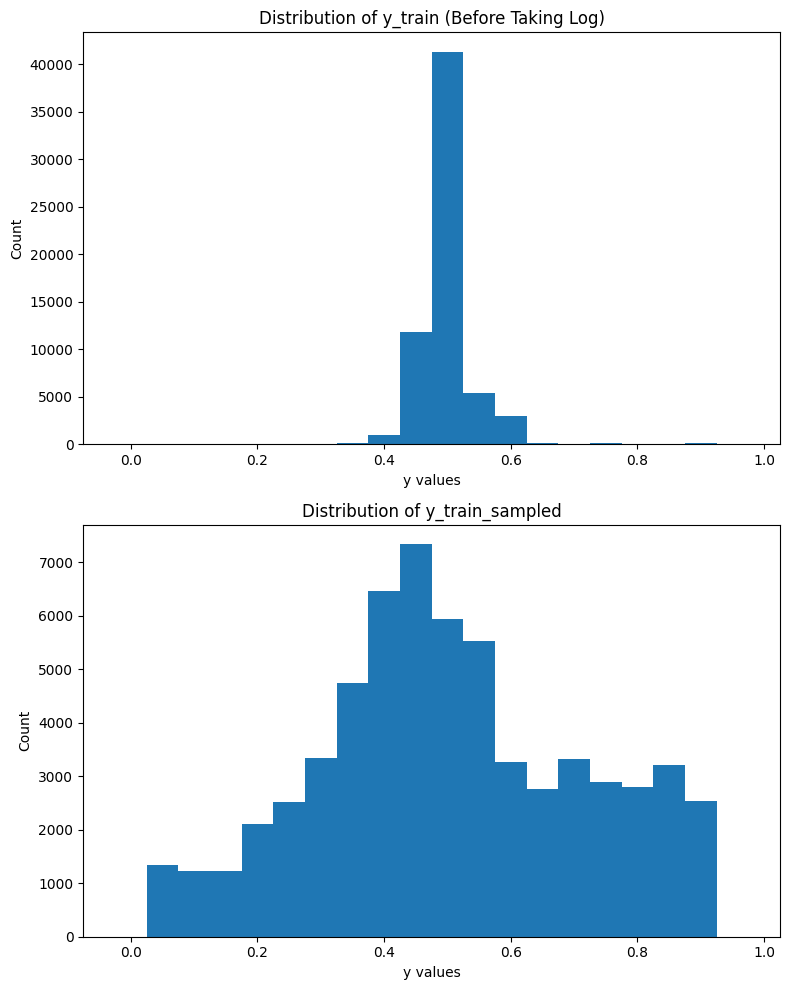

62568


In [2]:
bin_edges = np.linspace(0, 1, num=21)

hist, bin_edges = np.histogram(y_train, bins=bin_edges)
print(len(y_train))

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
# ax1.bar(bin_edges[:-1], hist, width=0.05)
# ax1.set_title('Distribution of y_train (Before Taking Log)')
# ax1.set_xlabel('y values')
# ax1.set_ylabel('Count')

hist_log = np.log(hist + 1)
# hist_log = np.log(hist_log + 1)
# hist_log = np.log(hist_log + 1)
# hist_log = np.ones(hist_log.shape)
hist_log_norm = hist_log / np.sum(hist_log)
print(hist_log_norm)
# # [0.         0.0312592  0.04000554 0.03927602 0.04294942 0.04840352
# #  0.05252923 0.05689486 0.06303176 0.0633484  0.07275313 0.05918789
# #  0.06092189 0.05710447 0.05275093 0.05346306 0.05456898 0.05097607
# #  0.05342812 0.0471475 ]
# ax2.bar(bin_edges[:-1], hist_log, width=0.05)
# ax2.set_title('Distribution of y_train (After Taking Log)')
# ax2.set_xlabel('y values')
# ax2.set_ylabel('Log Count')

# # plt.tight_layout()
# # plt.show()


sample_indices = []
for i in range(len(bin_edges[:-1])):
    indices = np.where(np.digitize(y_train, bin_edges) == i)[0]
    num_samples = int(hist_log_norm[i] * len(X_train))
    if len(indices) > 0:
        samples = np.random.choice(indices, size=num_samples, replace=(num_samples > len(indices)))
        sample_indices.extend(samples)

sample_indices = np.array(sample_indices)

X_train_sampled = X_train[sample_indices]
y_train_sampled = y_train[sample_indices]

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.bar(bin_edges[:-1], hist, width=0.05)
ax1.set_title('Distribution of y_train (Before Taking Log)')
ax1.set_xlabel('y values')
ax1.set_ylabel('Count')

hist_sampled, _ = np.histogram(y_train_sampled, bins=bin_edges)
ax2.bar(bin_edges[:-1], hist_sampled, width=0.05)
ax2.set_title('Distribution of y_train_sampled')
ax2.set_xlabel('y values')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()
X_train, y_train = X_train_sampled, y_train_sampled
print(len(y_train_sampled))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import numpy as np

train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)

params = {
    'learning_rate': 0.05, 
    'max_depth': 17, 
    'metric': 'mse', 
    'n_estimators': 500, 
    'num_leaves': 71, 
    'objective': 'regression'
}

model = lgb.train(params, train_data, num_boost_round=750)

y_pred = model.predict(X_test)

# # Define the parameter grid for grid search
# param_grid = {
#     'objective': ['regression'],
#     'metric': ['l1'],
#     'num_leaves': [31, 51, 71],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300]
# }

# # Define the LightGBM model
# model = lgb.LGBMRegressor()

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

for i in range(200):
    print(round(y_pred[i], 2), round(y_test[i], 2))

print(np.mean(y_pred))
print(np.mean(y_test))

In [74]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import numpy as np

train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)

params = {
    'learning_rate': 0.05, 
    'max_depth': -1, 
    'metric': {'binary_logloss', 'auc'},
    "boosting": "gbdt",
    'n_estimators': 500,
    "nthread": 24, 
    'num_leaves': 71, 
    'objective': 'binary'
}

model = lgb.train(params, train_data, num_boost_round=750)


# # Define the parameter grid for grid search
# param_grid = {
#     'objective': ['regression'],
#     'metric': ['l1'],
#     'num_leaves': [31, 51, 71],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300]
# }

# # Define the LightGBM model
# model = lgb.LGBMRegressor()

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)

/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 631, number of negative: 62703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.307733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297840
[LightGBM] [Info] Number of data points in the train set: 63334, number of used features: 1168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009963 -> initscore=-4.598859
[LightGBM] [Info] Start training from score -4.598859


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 1e-3).astype(bool)

# 假分类准确率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# 分类报告
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# 打印预测和实际值
for i in range(len(y_test)):
    print(f'{i}, {y_pred[i]}, {y_test[i]}')


Accuracy: 0.9884425918908678
Confusion Matrix:
 [[15635    33]
 [  150    16]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99     15668
        True       0.33      0.10      0.15       166

    accuracy                           0.99     15834
   macro avg       0.66      0.55      0.57     15834
weighted avg       0.98      0.99      0.99     15834

0, False, False
1, False, False
2, False, False
3, False, False
4, False, False
5, False, False
6, False, False
7, False, False
8, False, False
9, False, False
10, False, False
11, False, False
12, False, False
13, False, False
14, False, False
15, False, False
16, False, False
17, False, False
18, False, False
19, False, False
20, False, False
21, False, False
22, False, False
23, False, False
24, False, False
25, False, False
26, False, False
27, False, True
28, False, False
29, False, False
30, False, False
31, False, False
32, False, False
33, False, False
34,

15834


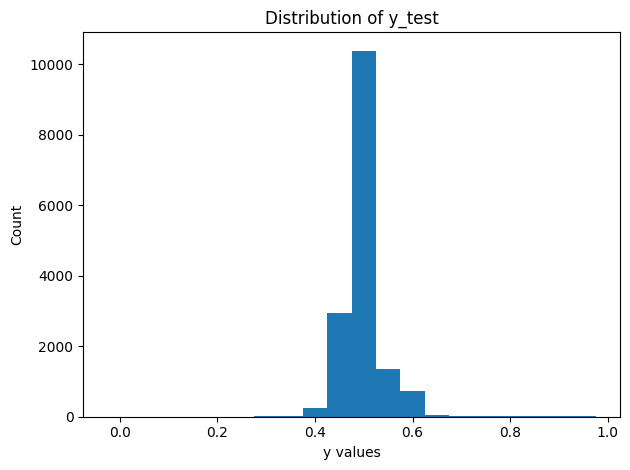

In [80]:
print(len(y_test))

import matplotlib.pyplot as plt

bin_edges = np.linspace(0, 1, num=21)
hist_sampled, _ = np.histogram(y_test, bins=bin_edges)
plt.bar(bin_edges[:-1], hist_sampled, width=0.05)
plt.title('Distribution of y_test')
plt.xlabel('y values')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [8]:
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 15, 'metric': 'l1', 'n_estimators': 300, 'num_leaves': 71, 'objective': 'regression'}


In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np

# X_np = np.array(X)
# y_np = np.array(y)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.1, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:linear',  # Regression task
    'eval_metric': 'rmse',  # Use Mean Absolute Error (MAE) as the evaluation metric
    'max_depth': 15,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'num_leaves': 71
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

# Print some example predictions and actual values
for i in range(100):
    print(y_pred[i], y_test[i])

/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.13919589516297096
MAE: 0.09747336601158084
R²: 0.08320169994644688
0.51878256 0.52
0.52030593 0.74
0.5876071 0.38
0.5224395 0.52
0.52811795 0.5
0.52304214 0.63
0.563252 0.43
0.52457815 0.1
0.53194356 0.47
0.5142223 0.4
0.6081063 0.75
0.5479203 0.5
0.51813036 0.52
0.57578176 0.95
0.5251916 0.76
0.5205286 0.54
0.62742656 0.67
0.51268566 0.51
0.5470426 0.52
0.5677895 0.93
0.6306319 0.54
0.58323014 0.77
0.5520662 0.48
0.5168496 0.42
0.55874527 0.5
0.51380867 0.62
0.5184954 0.52
0.5801005 0.52
0.5800565 0.64
0.50992024 0.52
0.55916923 0.49
0.63360053 0.52
0.58933 0.51
0.5200492 0.48
0.65810955 0.63
0.5101239 0.62
0.6741805 0.75
0.5587791 0.18
0.56793547 0.52
0.55446833 0.73
0.51006925 0.52
0.52981436 0.52
0.5125321 0.43
0.5155745 0.42
0.5280056 0.6
0.55800563 0.68
0.51544356 0.52
0.5759793 0.64
0.5141546 0.45
0.5178218 0.43
0.5301153 0.52
0.5124723 0.46
0.5791031 0.63
0.56962204 0.99
0.5689772 0.52
0.55022156 0.52
0.58992314 0.59
0.5872414 0.52
0.50886506 0.57
0.5077232 0.52
0.54233

# Get train data for BERT

In [2]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

train_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.multi.bf.trec'
train_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

train_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-train-20240429-9323ec.fabc40f467c7f2262628ce1e135b0337/embedding.pkl'
filename = f'{io_path}/nq_train/run.dpr.nq-train.{fusion_tag}.all-alpha.k-{k}.res'

In [18]:
import csv
import numpy as np
import pickle
import json

cutoff = 200
pkl_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.pkl'
csv_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.csv'
qa_path = '/root/.cache/anserini/topics-and-qrels/'
qa_file = f'{qa_path}topics.dpr.nq.train.txt'
print(qa_file)

with open(qa_file, 'r', encoding='utf-8') as file:
    data = [line.split('\t')[0] for line in file]

questions = [item for item in data]

questions_np = np.array(questions)
for question in questions[:5]:
    # what kind of money to take to bahamas?
    print(question)

questions_np = questions_np.reshape(-1, 1)
for question in questions_np[:5]:
    # ['what kind of money to take to bahamas?']
    print(question)

# # Load data using pickle
with open(pkl_file, 'rb') as f:
    Xy_np = pickle.load(f)
    X_np = Xy_np[:, :-1]
    # y_np = Xy_np[:, -1].reshape(-1, 1)

filename = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/run.dpr.nq-train.fusion.all-alpha.k-100.res'
filename += '.3_classes'
with open(filename, 'r') as f:
    print(f'filename: {filename}')
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
    print(f'filename[:5]: {rows[:5]}')
    y_np = np.array([float(alpha) for qid, alpha, num_hits in rows]).reshape(-1, 1).astype(int)


X_np = np.hstack((X_np[:, 768:868], X_np[:, 968:1068]))
print(f'questions_np.shape: {questions_np.shape}')
print(f'X_np.shape: {X_np.shape}')
X_np = np.hstack((questions_np, X_np))


print(X_np.shape)
print(y_np.shape)

# y_np = (np.abs(y_np - 0.5) >= 0.25).astype(int)
# print(y_np[:200])
# print(np.sum(y_np))
print(np.mean(y_np))
print(np.count_nonzero(y_np==0))

Xy_np = np.concatenate((X_np, y_np), axis=1)
bert_train = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_bert_classification_train_Xy-top{cutoff}.3_classes.pkl'
with open(bert_train, 'wb') as f:
    pickle.dump(Xy_np, f)


/root/.cache/anserini/topics-and-qrels/topics.dpr.nq.train.txt
total number of death row inmates in the us
big little lies season 2 how many episodes
who sang waiting for a girl like you
where do you cross the arctic circle in norway
who is the main character in green eggs and ham
['total number of death row inmates in the us']
['big little lies season 2 how many episodes']
['who sang waiting for a girl like you']
['where do you cross the arctic circle in norway']
['who is the main character in green eggs and ham']
filename: /dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/run.dpr.nq-train.fusion.all-alpha.k-100.res.3_classes
filename[:5]: [['0', '1', '0'], ['1', '1', '3'], ['2', '1', '3'], ['3', '1', '3'], ['4', '1', '3']]
questions_np.shape: (79168, 1)
X_np.shape: (79168, 200)
(79168, 201)
(79168, 1)
1.1824979789814067
1.1824979789814067
485


# Get test data for BERT

In [18]:
import csv
import numpy as np
import pickle
import json

cutoff = 200
qa_path = '/root/.cache/anserini/topics-and-qrels/'
qa_file = f'{qa_path}topics.dpr.nq.test.txt'
print(qa_file)

with open(qa_file, 'r', encoding='utf-8') as file:
    data = [line.split('\t')[0] for line in file]

questions = [item for item in data]

questions_np = np.array(questions)
for question in questions[:5]:
    # what kind of money to take to bahamas?
    print(question)

questions_np = questions_np.reshape(-1, 1)
for question in questions_np[:5]:
    # ['what kind of money to take to bahamas?']
    print(question)

pkl_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_X.pkl'
csv_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_X.csv'
# with open(csv_file, 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)
#     X_np = np.array(data).astype(float)

# with open(pkl_file, 'wb') as f:
#     pickle.dump(X_np, f)

# Load data using pickle
with open(pkl_file, 'rb') as f:
    X_np = pickle.load(f)


X_np = np.hstack((X_np[:, 768:868], X_np[:, 968:1068]))
print(f'questions_np.shape: {questions_np.shape}')
print(f'X_np.shape: {X_np.shape}')
X_np = np.hstack((questions_np, X_np))


print(X_np.shape)

bert_test = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/nq_bert_test_Xy-top{cutoff}.pkl'
with open(bert_test, 'wb') as f:
    pickle.dump(X_np, f)
    


/root/.cache/anserini/topics-and-qrels/topics.dpr.nq.test.txt
who got the first nobel prize in physics
when is the next deadpool movie being released
which mode is used for short wave broadcast service
the south west wind blows across nigeria between
what does hp mean in war and order
['who got the first nobel prize in physics']
['when is the next deadpool movie being released']
['which mode is used for short wave broadcast service']
['the south west wind blows across nigeria between']
['what does hp mean in war and order']
questions_np.shape: (3610, 1)
X_np.shape: (3610, 200)
(3610, 201)


# Test BERT

In [1]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'dpr.bm25.fusion.bert'

filename = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-test-20210419-9323ec.1791f1ed078beb3a00847f75023eb020/embedding.pkl'


In [2]:
alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/nq_bert_test_predictions.csv'
test_out_trec_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-custom-bert.k-{k}.trec'
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-custom-bert.k-{k}.json'

cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-custom \
        --method halftops  \
        --alphafile {alphafile} \
        --depth {depth}  \
        --nq -1  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/pyserini/autofusion/_base.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  half_tops.run_data = pd.concat([half_tops.run_data, runs[0].run_data.iloc[idx * 1000: idx * 1000 + 50]])


Merge fininshed
     topic  q0     docid rank      score       tag
0        0  Q0  14087661    1  78.760086     Faiss
1        0  Q0    125667    2  78.503571     Faiss
2        0  Q0    458534    3  78.344795     Faiss
3        0  Q0   6438504    4  77.968094     Faiss
4        0  Q0   4622974    5  77.894936     Faiss
...    ...  ..       ...  ...        ...       ...
47       0  Q0   5813762   48  13.034091  Anserini
48       0  Q0   2310962   49  13.024763  Anserini
49       0  Q0    628722   50  13.021599  Anserini
1000     1  Q0  18286085    1  86.558212     Faiss
1001     1  Q0  18960839    2  84.456924     Faiss

[102 rows x 6 columns]


0

In [3]:

cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run_on_cache \
  --index wikipedia-dpr-100w \
  --topics dpr-nq-test \
  --gt {cache_path}nq_test_bf_qid_gt_set.pkl {cache_path}nq_test_bm25_qid_gt_set.pkl \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


Jun 21, 2024 8:50:24 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 361000/361000 [03:59<00:00, 1509.11it/s]


0

In [4]:
# test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.k-{k}.json'
nq = -1
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-custom-bert.k-{k}.json'
print(test_out_json_path)
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)


/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.bert.alpha-custom-bert.k-100.json


100%|██████████| 3610/3610 [00:00<00:00, 19013.21it/s]


qid: 2	Top100	has_answer: 0
qid: 6	Top100	has_answer: 0
qid: 7	Top100	has_answer: 0
qid: 9	Top100	has_answer: 0
qid: 10	Top100	has_answer: 0
qid: 17	Top100	has_answer: 0
qid: 38	Top100	has_answer: 0
qid: 44	Top100	has_answer: 0
qid: 48	Top100	has_answer: 0
qid: 53	Top100	has_answer: 0
qid: 58	Top100	has_answer: 0
qid: 70	Top100	has_answer: 0
qid: 87	Top100	has_answer: 0
qid: 106	Top100	has_answer: 0
qid: 112	Top100	has_answer: 0
qid: 119	Top100	has_answer: 0
qid: 130	Top100	has_answer: 0
qid: 149	Top100	has_answer: 0
qid: 173	Top100	has_answer: 0
qid: 205	Top100	has_answer: 0
qid: 212	Top100	has_answer: 0
qid: 221	Top100	has_answer: 0
qid: 224	Top100	has_answer: 0
qid: 229	Top100	has_answer: 0
qid: 232	Top100	has_answer: 0
qid: 233	Top100	has_answer: 0
qid: 240	Top100	has_answer: 0
qid: 241	Top100	has_answer: 0
qid: 242	Top100	has_answer: 0
qid: 245	Top100	has_answer: 0
qid: 253	Top100	has_answer: 0
qid: 271	Top100	has_answer: 0
qid: 291	Top100	has_answer: 0
qid: 297	Top100	has_answer:

0

## Get test ground truth


In [7]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'dpr.bm25.fusion.gt'

filename = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-test-20210419-9323ec.1791f1ed078beb3a00847f75023eb020/embedding.pkl'


In [3]:
nq = -1
for alpha in tqdm(np.arange(0, 1.05, 0.05)):
    alpha = round(alpha, 2)
    alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/alpha-{alpha}.csv'
    test_out_trec_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.trec'
    test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.json'
    cmd0 = f'python -m pyserini.autofusion \
            --runs {test_bf_trec_path} {test_bm25_trec_path}    \
            --runtag {fusion_tag}-custom \
            --method custom  \
            --alphafile {alphafile} \
            --depth {depth}  \
            --nq {nq}  \
            --k {k} \
            --output {test_out_trec_path}'
    # print(cmd0)
    os.system(cmd0)

    cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
        --index wikipedia-dpr-100w \
        --topics dpr-nq-test \
        --input {test_out_trec_path} \
        --output {test_out_json_path}'
    os.system(cmd1)

  0%|          | 0/21 [00:00<?, ?it/s]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 11:38:52 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
  5%|▍         | 1/21 [06:04<2:01:20, 364.05s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 11:44:49 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 10%|▉         | 2/21 [11:58<1:53:32, 358.53s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 11:50:47 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 14%|█▍        | 3/21 [17:51<1:46:49, 356.11s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 11:56:40 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 19%|█▉        | 4/21 [24:35<1:46:11, 374.79s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:03:19 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 24%|██▍       | 5/21 [30:48<1:39:45, 374.09s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:09:35 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 29%|██▊       | 6/21 [36:44<1:31:58, 367.92s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:15:32 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 33%|███▎      | 7/21 [42:45<1:25:22, 365.91s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:21:33 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 38%|███▊      | 8/21 [48:43<1:18:43, 363.37s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:27:24 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 43%|████▎     | 9/21 [54:20<1:11:01, 355.08s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:33:00 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 48%|████▊     | 10/21 [1:00:06<1:04:32, 352.06s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:38:53 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 52%|█████▏    | 11/21 [1:06:05<59:02, 354.24s/it]  

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:44:45 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 57%|█████▋    | 12/21 [1:11:57<53:01, 353.52s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:50:37 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 62%|██████▏   | 13/21 [1:17:46<46:57, 352.14s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 12:56:26 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 67%|██████▋   | 14/21 [1:23:39<41:08, 352.66s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:02:20 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 71%|███████▏  | 15/21 [1:29:39<35:28, 354.71s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:08:25 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 76%|███████▌  | 16/21 [1:35:40<29:42, 356.58s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:14:20 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 81%|████████  | 17/21 [1:41:32<23:41, 355.35s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:20:15 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 86%|████████▌ | 18/21 [1:47:33<17:51, 357.02s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:26:14 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 90%|█████████ | 19/21 [1:53:30<11:53, 356.82s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:32:09 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 95%|█████████▌| 20/21 [1:59:21<05:55, 355.36s/it]

num_queries: 3610000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 23, 2024 1:38:05 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 21/21 [2:05:23<00:00, 358.25s/it]


In [5]:
filename = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res.test'
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-?.nq-{nq}.k-{k}.json'

cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval_all_alpha \
    --retrieval {test_out_json_path} \
    --topk 100  \
    --traindata False'
res = os.system(cmd2 + f'1> {filename}')
print(filename)

  0%|          | 0/21 [00:00<?, ?it/s]
0it [00:00, ?it/s]
3610it [00:00, 18673.01it/s]
  5%|▍         | 1/21 [00:01<00:22,  1.12s/it]
0it [00:00, ?it/s]
1598it [00:00, 15975.03it/s]
3610it [00:00, 17154.03it/s]
 10%|▉         | 2/21 [00:02<00:24,  1.28s/it]
0it [00:00, ?it/s]
3610it [00:00, 18800.78it/s]
 14%|█▍        | 3/21 [00:04<00:25,  1.41s/it]
0it [00:00, ?it/s]
3610it [00:00, 18714.09it/s]
 19%|█▉        | 4/21 [00:05<00:23,  1.39s/it]
0it [00:00, ?it/s]
3610it [00:00, 18691.13it/s]
 24%|██▍       | 5/21 [00:06<00:22,  1.38s/it]
0it [00:00, ?it/s]
1626it [00:00, 16250.41it/s]
3610it [00:00, 17835.09it/s]
 29%|██▊       | 6/21 [00:08<00:20,  1.38s/it]
0it [00:00, ?it/s]
3610it [00:00, 18865.86it/s]
 33%|███▎      | 7/21 [00:09<00:19,  1.41s/it]
0it [00:00, ?it/s]
3610it [00:00, 18843.44it/s]
 38%|███▊      | 8/21 [00:10<00:18,  1.39s/it]
0it [00:00, ?it/s]
3610it [00:00, 18965.37it/s]
 43%|████▎     | 9/21 [00:12<00:16,  1.37s/it]
0it [00:00, ?it/s]
1720it [00:00, 17198.58it/s]


/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.gt.all-alpha.nq--1.k-100.res.test


In [39]:
print(test_out_json_path)
print(filename)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.gt.alpha-?.nq--1.k-100.json


In [14]:
import csv
with open(filename, 'r') as f:
    print(f'filename: {filename}')
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
    print(rows[:5])
    gt_y = [float(alpha) for qid, alpha, num_hits in rows]
    gt_y = np.array(gt_y)

gt_y = np.abs(gt_y - 0.5) > 0.25

true_ratio = np.sum(gt_y) / len(gt_y)
false_ratio = 1 - true_ratio

print((true_ratio * 0.24 + false_ratio * 0.93) * 0.93)
gt_y = np.array([1.0 if y else 0.5 for y in gt_y])
print(gt_y)
print(np.mean(gt_y))

nq = -1
gt_csv = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.csv'
with open(gt_csv, 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    for alpha in gt_y:
        writer.writerow([alpha])
print(gt_csv)

filename: /dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.gt.all-alpha.nq--1.k-100.res
[['0', '0.55', '21'], ['1', '0.49', '157'], ['2', '0.42', '16'], ['3', '0.62', '18'], ['4', '0.62', '18']]
0.9158559556786704
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
0.5102493074792244
/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.gt.alpha-gt.nq--1.k-100.csv


In [14]:

nq = -1
alphafile = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq--1.k-{k}.csv'
test_out_trec_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.trec'
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-custom \
        --method custom  \
        --alphafile {alphafile} \
        --depth {depth}  \
        --nq {nq}  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

num_queries: 3610000


0

In [7]:
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
print(test_out_json_path)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.dpr.bm25.fusion.gt.alpha-gt.nq--1.k-100.json


In [15]:

cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run_on_cache \
  --index wikipedia-dpr-100w \
  --topics dpr-nq-test \
  --gt {cache_path}nq_test_bf_qid_gt_set.pkl {cache_path}nq_test_bm25_qid_gt_set.pkl \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


Jun 21, 2024 1:18:27 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 361000/361000 [01:03<00:00, 5668.16it/s]


0

In [ ]:
# test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.k-{k}.json'
nq = -1
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
print(test_out_json_path)
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)
# bm25 + bf
# Top20	accuracy: 0.1748
# Top100	accuracy: 0.8535

# bf + bm25
# Top20	accuracy: 0.1650
# Top100	accuracy: 0.8555


## Get test features

In [1]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

filename = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.all-alpha.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-test-20210419-9323ec.1791f1ed078beb3a00847f75023eb020/embedding.pkl'



In [ ]:
import csv
import pickle

cutoff = 200

with open(test_bf_trec_path, 'r') as f:
    print(f'test_bf_trec_path: {test_bf_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bf_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bf_score_list.append(curr)
                curr = []
        else:
            continue

with open(test_bm25_trec_path, 'r') as f:
    print(f'test_bm25_trec_path: {test_bm25_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bm25_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)        
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bm25_score_list.append(curr)
                curr = []
        else:
            continue

with open(test_embedding_path, 'rb') as f:
    print(f'test_embedding_path: {test_embedding_path}')
    embeddings = pickle.load(f)
    embeddings = embeddings['embedding'].tolist()
    print(embeddings[:5])

In [104]:
nq = len(embeddings)
print(nq)

print(len(embeddings), len(embeddings[0]))
print(len(bf_score_list), len(bf_score_list[0]))
print(len(bm25_score_list), len(bm25_score_list[0]))

X = [list(embeddings[i]) + bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# X = [bf_score_list[i] + bm25_score_list[i] for i in range(nq)]


with open('/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_X.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(X)

NameError: name 'embeddings' is not defined

In [77]:
import csv
import numpy as np
import pickle

pkl_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_X.pkl'
csv_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_X.csv'
# with open(csv_file, 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)
#     X_np = np.array(data).astype(float)

# with open(pkl_file, 'wb') as f:
#     pickle.dump(X_np, f)

# Load data using pickle
with open(pkl_file, 'rb') as f:
    X_np = pickle.load(f)

# X_np = X_np[:, :768]
# X_np = X_np[:, 768:]
print(X_np.shape)

X_test = X_np

(3610, 1168)


In [78]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 1e-3).astype(bool)
y_pred = np.array([1.0 if x else 0.5 for x in y_pred]).astype(float)
print(f'count of True in y_pred: {np.count_nonzero(y_pred==True)}')

print(y_pred)
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_pred: {y_pred.shape}')
print(f'average of y_pred: {np.mean(y_pred)}')

alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_y_pred.csv'
test_out_trec_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-custom.k-{k}.trec'
test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-custom.k-{k}.json'

print(f'alphafile: {alphafile}')

with open(alphafile, 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(y_pred)

count of True in y_pred: 4
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
shape of X_test: (3610, 1168)
shape of y_pred: (3610,)
average of y_pred: 0.5005540166204986
alphafile: /dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_y_pred.csv


In [18]:
filename = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.multi.bf.bm25.fusion.all-alpha.nq-1024.k-100.res'
print(filename)
os.system('head -n 10 ' + filename)


/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.multi.bf.bm25.fusion.all-alpha.nq-1024.k-100.res
Average alpha: 0.4978
0	0.58	21
1	0.48	157
2	0.49	16
3	0.52	18
4	0.52	18
5	0.62	32
6	0.52	20
7	0.52	0
8	0.65	299


0

In [119]:
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)
    data_np = np.array(data).astype(float)
    y_truth = data_np[:, 1]
    print(y_truth[:5])

y_pred = y_pred[:1024]
print(f'shape of y_truth: {y_truth.shape}')
print(f'shape of y_pred: {y_pred.shape}')

mse = mean_squared_error(y_truth, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_truth, y_pred)
print('MAE:', mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_truth, y_pred)
print('R²:', r2)

[0.75 0.15 0.05 0.15 0.15]
shape of y_truth: (1024,)
shape of y_pred: (1024,)
RMSE: 0.38694027424841004
MAE: 0.30688381550070554
R²: -0.3627514216569414


In [2]:

alpha = 0.15
# alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/alpha-{alpha}.csv'
# test_out_trec_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.k-{k}.trec'
# test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.k-{k}.json'
# alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_test_y_pred.csv'
# test_out_trec_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-custom.k-{k}.trec'
# test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-custom.k-{k}.json'

# cmd0 = f'python -m pyserini.autofusion \
#         --runs {test_bf_trec_path} {test_bm25_trec_path}    \
#         --runtag {fusion_tag}-custom \
#         --method custom  \
#         --alphafile {alphafile} \
#         --depth {depth}  \
#         --nq -1  \
#         --k {k} \
#         --output {test_out_trec_path}'
# os.system(cmd0)

test_out_trec_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.rrf.k-{k}.trec'
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.rrf.k-{k}.json'
cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-rrf \
        --method rrf  \
        --depth {depth}  \
        --nq -1  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

0

In [3]:
# cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
#   --index wikipedia-dpr-100w \
#   --topics dpr-nq-test \
#   --input {test_out_trec_path} \
#   --output {test_out_json_path}'
# os.system(cmd1)


cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run_on_cache \
  --index wikipedia-dpr-100w \
  --topics dpr-nq-test \
  --gt {cache_path}nq_test_bf_qid_gt_set.pkl {cache_path}nq_test_bm25_qid_gt_set.pkl \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.nq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


Jun 02, 2024 1:46:50 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 361000/361000 [01:21<00:00, 4406.89it/s]


0

In [4]:
# test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-0.15.k-{k}.json'
test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-custom.k-{k}.json'
test_out_json_path = f'{io_path}/nq_test/run.dpr.nq-test.{fusion_tag}.rrf.k-{k}.json'
print(test_out_json_path)
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)
# bm25 + bf
# Top20	accuracy: 0.1748
# Top100	accuracy: 0.8535

# bf + bm25
# Top20	accuracy: 0.1650
# Top100	accuracy: 0.8555


/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_test/run.dpr.nq-test.fusion.rrf.k-100.json


100%|██████████| 3610/3610 [00:00<00:00, 18373.68it/s]


qid: 2	Top100	has_answer: 0
qid: 7	Top100	has_answer: 0
qid: 9	Top100	has_answer: 0
qid: 10	Top100	has_answer: 0
qid: 17	Top100	has_answer: 0
qid: 38	Top100	has_answer: 0
qid: 44	Top100	has_answer: 0
qid: 48	Top100	has_answer: 0
qid: 53	Top100	has_answer: 0
qid: 70	Top100	has_answer: 0
qid: 87	Top100	has_answer: 0
qid: 106	Top100	has_answer: 0
qid: 112	Top100	has_answer: 0
qid: 119	Top100	has_answer: 0
qid: 130	Top100	has_answer: 0
qid: 149	Top100	has_answer: 0
qid: 173	Top100	has_answer: 0
qid: 205	Top100	has_answer: 0
qid: 212	Top100	has_answer: 0
qid: 221	Top100	has_answer: 0
qid: 224	Top100	has_answer: 0
qid: 229	Top100	has_answer: 0
qid: 232	Top100	has_answer: 0
qid: 233	Top100	has_answer: 0
qid: 240	Top100	has_answer: 0
qid: 241	Top100	has_answer: 0
qid: 242	Top100	has_answer: 0
qid: 245	Top100	has_answer: 0
qid: 253	Top100	has_answer: 0
qid: 271	Top100	has_answer: 0
qid: 291	Top100	has_answer: 0
qid: 297	Top100	has_answer: 0
qid: 304	Top100	has_answer: 0
qid: 311	Top100	has_answ

0

In [ ]:
nq = -1
for alpha in tqdm(np.arange(0, 1.05, 0.05)):
    alpha = round(alpha, 2)
    alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/alpha-{alpha}.csv'
    test_out_trec_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.k-{k}.trec'
    test_out_json_path = f'{io_path}/nq_train/run.dpr.nq-test.{fusion_tag}.alpha-{alpha}.k-{k}.json'
    cmd0 = f'python -m pyserini.autofusion \
            --runs {test_bf_trec_path} {test_bm25_trec_path}    \
            --runtag {fusion_tag}-custom \
            --method custom  \
            --alphafile {alphafile} \
            --depth {depth}  \
            --nq {nq}  \
            --k {k} \
            --output {test_out_trec_path}'
    # print(cmd0)
    os.system(cmd0)

    cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
        --index wikipedia-dpr-100w \
        --topics dpr-nq-test \
        --input {test_out_trec_path} \
        --output {test_out_json_path}'
    os.system(cmd1)

    cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
        --retrieval {test_out_json_path} \
        --topk 100'
    filename = f'{io_path}/nq_test/run.dpr.nq-test.multi.bf.bm25.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.res'
    res = os.system(cmd2 + ' 1>' + filename)